In [82]:
import pandas as pd
from datetime import datetime as dt
df = pd.read_csv("date_sample.csv",sep=",")

In [83]:
df.head()

,datetime,user_id,value
0,20170606121314,1,2
1,20170606121315,1,3
2,20170606121316,1,4
3,20170608121616,1,4
4,20170608121617,1,1


In [84]:
df.tail()

,datetime,user_id,value
9,20170608121543,2,4
10,20170606134002,3,21
11,20170606134003,3,10
12,20170606134004,3,4
13,20170608134005,3,50


In [85]:
df.datetime = [dt.strptime(str(i), "%Y%m%d%H%M%S") for i in df.datetime]

In [86]:
df.head()

,datetime,user_id,value
0,2017-06-06 12:13:14,1,2
1,2017-06-06 12:13:15,1,3
2,2017-06-06 12:13:16,1,4
3,2017-06-08 12:16:16,1,4
4,2017-06-08 12:16:17,1,1


上記のは非効率なのでやり方を変える

In [87]:
df.datetime = df.datetime.apply(lambda d: dt.strptime(str(d), "%Y%m%d%H%M%S"))

ValueError: time data '2017-06-06 12:13:14' does not match format '%Y%m%d%H%M%S'

In [89]:
df.head()
df.columns = ["datetime","user_id","value"]

In [90]:
df_by_user_id= df.groupby("user_id")["value"].count().reset_index()
df_by_user_id

,user_id,value
0,1,6
1,2,4
2,3,4


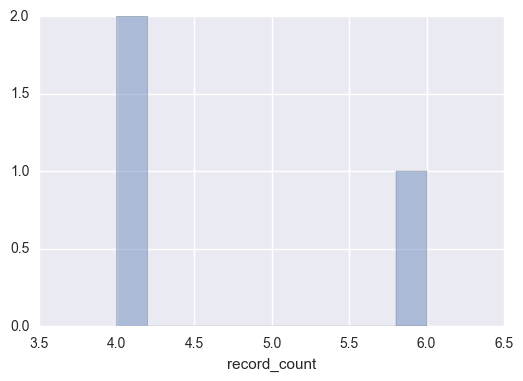

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
user_df = pd.DataFrame(df_by_user_id)
sns.distplot(user_df.value, kde=False, rug=False, axlabel="record_count",bins=10)


In [67]:
datetime_by_user_id = df.groupby(["user_id"])["datetime"].first().reset_index()
date_df = pd.DataFrame(datetime_by_user_id)
date_df

,user_id,datetime
0,1,2017-06-06 12:13:14
1,2,2017-06-06 12:15:40
2,3,2017-06-06 13:40:02


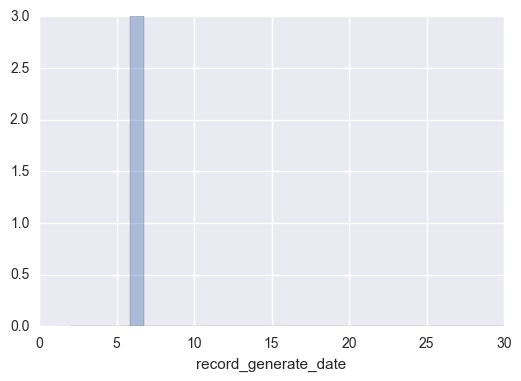

In [95]:
sns.distplot(date_df.datetime.dt.month, kde=False, rug=False, axlabel="record_generate_date",hist_kws={"range": [1,30]}, bins=30)

In [ ]:
↑ 12と13のデータしかない

In [91]:
df_by_user_id= df.groupby("user_id")["value"].sum().reset_index()
df_by_user_id

,user_id,value
0,1,16
1,2,33
2,3,85
